Reference: `{SYNERGIA2_DIR, devel-3}/src/analysis_tools/beam_ploy.py`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

import scipy.sparse as spsparse
import scipy.sparse.linalg as sparsela

from scipy.interpolate import griddata

In [2]:
coords = {}

coords['x']      = 0
coords['xp']     = 1
coords['y']      = 2
coords['yp']     = 3
coords['cdt']    = 4
coords['dpop']   = 5
coords['pz']     = 7
coords['energy'] = 8
coords['t']      = 9
coords['z']      = 10

In [3]:
filename = '/home/sajid/data/accelsim/twobunchff.03/turn_particles_0001.h5'

c = 299792458.0
hcoord = 'x'
vcoord = 'y'

h5        = h5py.File(filename, 'r')
particles = h5.get('particles')
npart     = particles.shape[0]
mass      = h5.get('mass')[()]
p_ref     = h5.get('pz')[()]
pz        = (p_ref * (1.0 + particles[:,5])).reshape(npart, 1)
betagamma = p_ref/mass
gamma     = np.sqrt(betagamma**2 + 1)
beta      = betagamma/gamma
energy    = np.sqrt(pz*pz + mass**2).reshape(npart, 1)
time      = (particles[:,4]*1.0e9/c).reshape(npart,1)
z         = (particles[:,4]*beta).reshape(npart,1)
particles = np.hstack((particles, pz, energy,time, z))

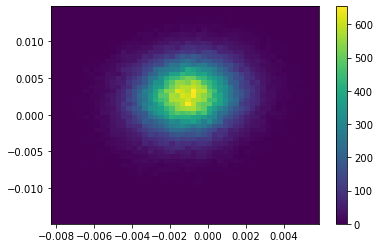

In [4]:
x = particles[:,coords[hcoord]]
y = particles[:,coords[vcoord]]
H, xedges, yedges = np.histogram2d(x, y, bins=50)
_xedges = (xedges[0:-1] + xedges[1:])/2.0
_yedges = (yedges[0:-1] + yedges[1:])/2.0
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X,Y,H)
plt.colorbar()

In [5]:
x = np.load('x-idx.npy')
y = np.load('y-idx.npy')

ix = np.load('ix-idx.npy')
iy = np.load('iy-idx.npy')

bx = np.load('bx-idx.npy')
by = np.load('by-idx.npy')

bidx = np.load('b-idx.npy')

In [6]:
_xe, _ye = np.meshgrid(_xedges, _yedges)
x1 = x/1
y1 = y/1
charge_density = griddata((_xe.flatten(), _ye.flatten()), H.flatten(), (x1, y1), method='nearest')

charge_density[bidx] = 0

In [7]:
A = spsparse.load_npz('A.npz')

In [8]:
potential = spsparse.linalg.spsolve(A, charge_density, use_umfpack=True)

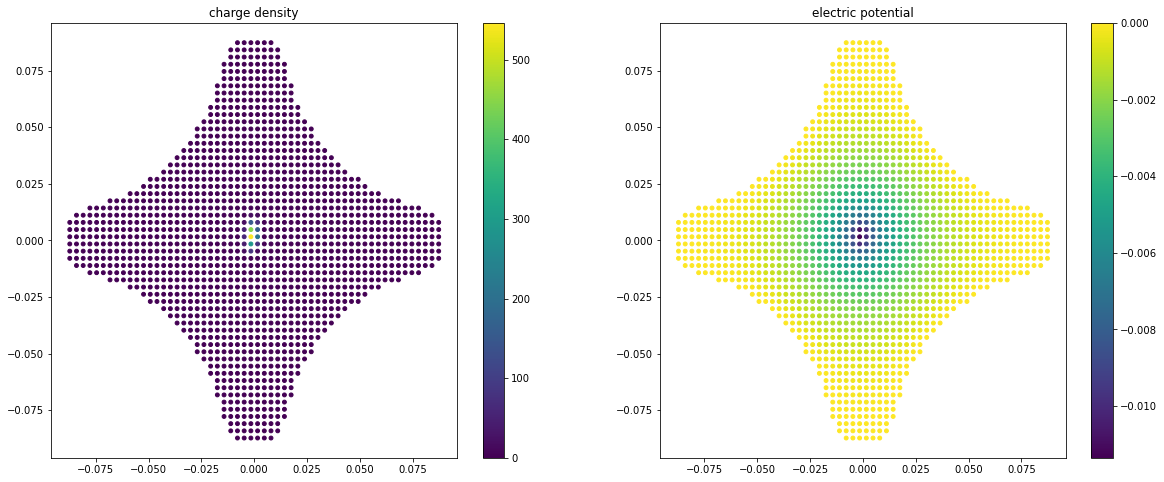

In [9]:
f,ax=plt.subplots(1,2)
f.set_size_inches(20,8)

im0 = ax[0].scatter(x1, y1, s=15, c=charge_density)
ax[0].set_title('charge density')
plt.colorbar(im0, ax=ax[0])

im1 = ax[1].scatter(x1, y1, s=15, c=potential)
ax[1].set_title('electric potential')
plt.colorbar(im1, ax=ax[1])

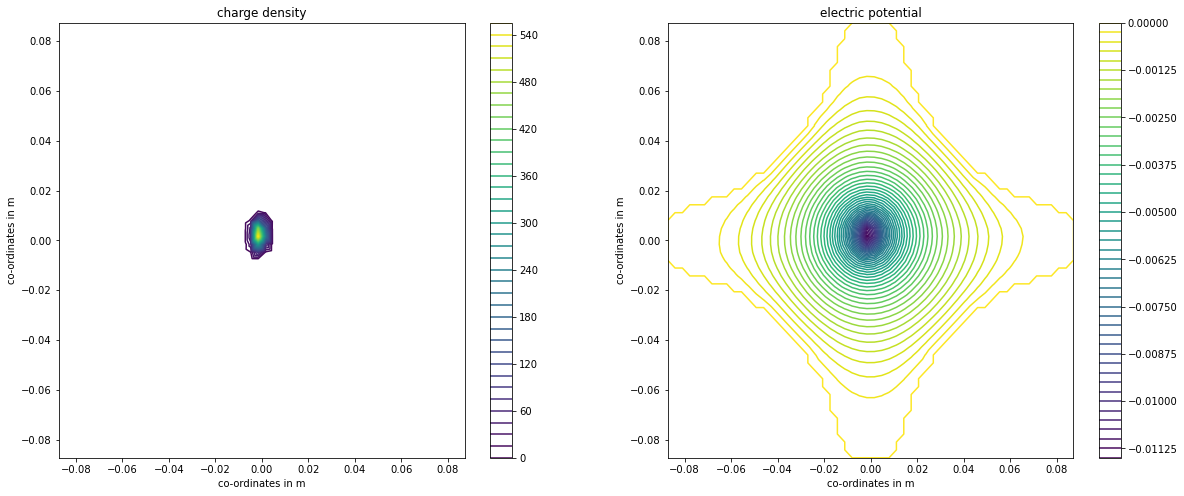

In [10]:
import matplotlib.tri as tri

f,ax=plt.subplots(1,2)
f.set_size_inches(20,8)

im0 = ax[0].tricontour(x1, y1, charge_density, levels=50)
ax[0].set_title('charge density')
ax[0].set_xlabel('co-ordinates in m')
ax[0].set_ylabel('co-ordinates in m')
plt.colorbar(im0, ax=ax[0])

im1 = ax[1].tricontour(x1, y1, potential, levels=50)
ax[1].set_title('electric potential')
ax[1].set_xlabel('co-ordinates in m')
ax[1].set_ylabel('co-ordinates in m')
plt.colorbar(im1, ax=ax[1])